In [77]:
from __future__ import print_function, division
import pandas
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


First, load the data into a pandas dataframe. This is the most recent ESS round, round 7. 

ESS data is representative, not oversampled.

In [78]:
ess = pandas.read_stata('ESS7e02_1.dta',convert_categoricals=False, convert_missing=False)

Variables of interest:
http://nesstar.ess.nsd.uib.no/webview/


happy: How happy are you 

Apurva

    +2 extra

    health: subjective general health

    aesfdrk: Feeling of safety of walking alone in local area after dark

    almuslv: Allow many or few Muslims to come and live in country

    blgetmg: belong to minority ethnic group in that country

    imptrad: Important to follow traditions and customs

Celina

    +2 extra

    ipudrst: Important to understand different people

    impfun: Important to seek fun and things that give pleasure 

    smegbhw: Some races or ethnic groups: born harder working 

    smegbli: Some races or ethnic groups: born less intelligent 

    cntry: Country



In [79]:
"""
Plots a histogram of a variable from the ess dataframe.

column_name: column from ess
upper_bound: maximum valid value
label: what the variable is measuring

returns: hist
"""

def OurPlot(column_name, upper_bound, label):
    ess.loc[column_name > upper_bound] = np.nan
    hist = thinkstats2.Hist(column_name)
    thinkplot.Hist(hist)
    thinkplot.Show(xlabel='%s' %label, ylabel='Frequency')
    return hist

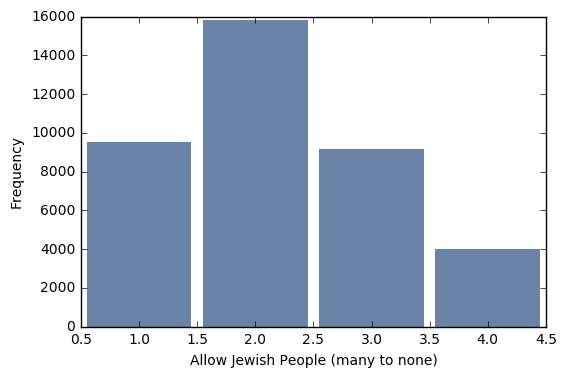

In [80]:
immjew_hist = OurPlot(ess.aljewlv, 4, 'Allow Jewish People (many to none)')

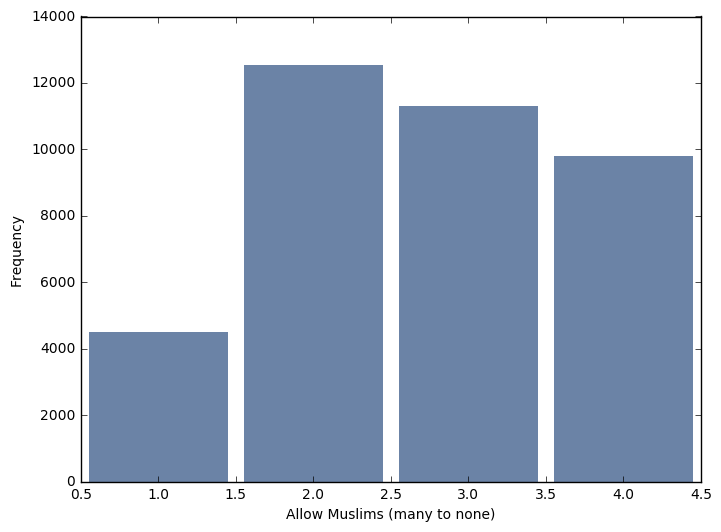

In [81]:
immmus_hist = OurPlot(ess.almuslv, 4, "Allow Muslims (many to none)")

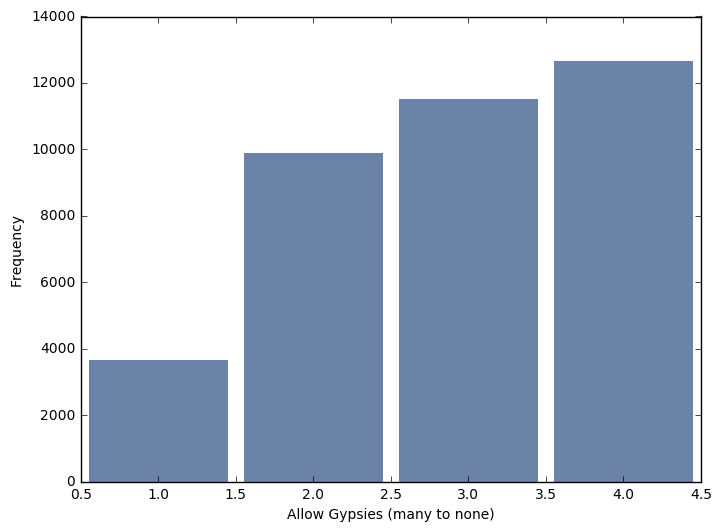

In [82]:
immgyp_hist = OurPlot(ess.algyplv, 4, "Allow Gypsies (many to none)")

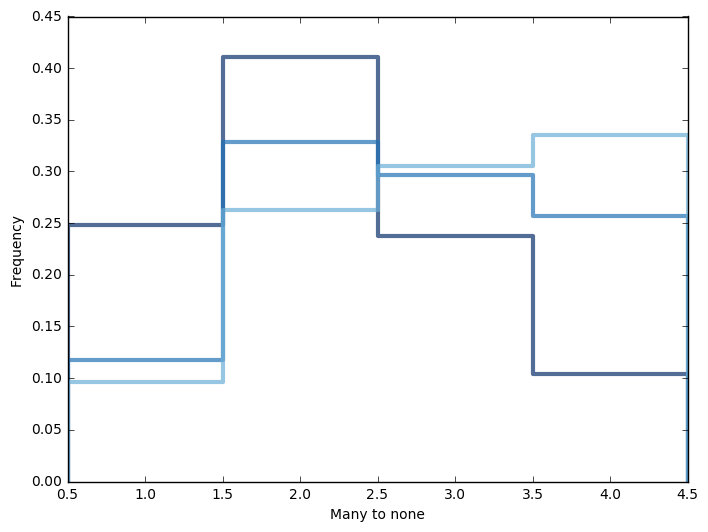

In [83]:
immjew_pmf = thinkstats2.Pmf(immjew_hist, "Allowing Jews")
immmus_pmf = thinkstats2.Pmf(immmus_hist, "Allowing Muslims")
immgyp_pmf = thinkstats2.Pmf(immgyp_hist, "Allowing Gypsies")

thinkplot.PrePlot(3)
thinkplot.Pmfs([immjew_pmf, immmus_pmf, immgyp_pmf])
thinkplot.Config(xlabel='Many to none', ylabel='Frequency')
thinkplot.Show()

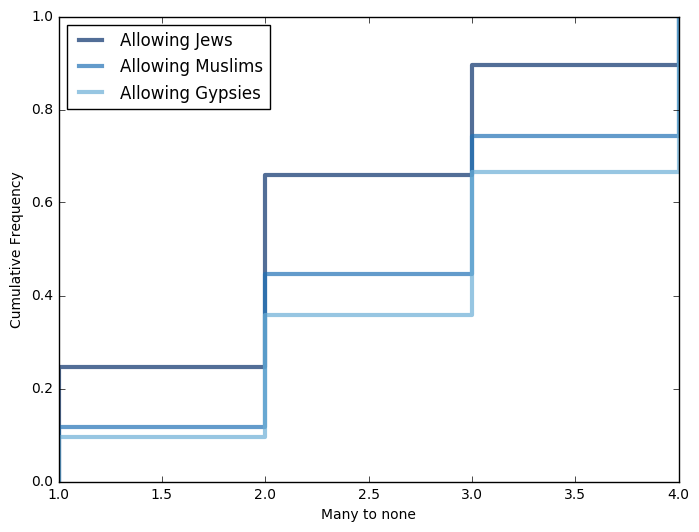

In [84]:
immjew_cdf = thinkstats2.Cdf(ess.aljewlv, label = "Allowing Jews")
immmus_cdf = thinkstats2.Cdf(ess.almuslv, label = "Allowing Muslims")
immgyp_cdf = thinkstats2.Cdf(ess.algyplv, label =  "Allowing Gypsies")

mycdfs = [immjew_cdf, immmus_cdf, immgyp_cdf]
thinkplot.PrePlot(3)
thinkplot.Cdfs(mycdfs)
plt.legend(loc = "upper left")

thinkplot.Config(xlabel='Many to none', ylabel='Cumulative Frequency', legend = False)

thinkplot.Show()

In [85]:

country_dict = {'AT':'Austria', 'BE':'Belgium', 'CH':'Switzerland', 'CZ':'Czech Republic', 'DE':'Germany', 'DK':'Denmark', 'EE':'Estonia', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 'GB':'United Kingdom', 'HU':'Hungary', 'IE':'Ireland', 'IL':'Israel', 'LT':'Lithuania', 'NL':'Netherlands', 'NO':'Norway', 'PL':'Poland', 'PT':'Portgual', 'SE':'Sweden', 'SI':'Slovenia'}

In [86]:
#list of countries
country_list = ['AT', 'BE', 'CH', 'CZ', 'DE', 'DK', 
                'EE', 'ES', 'FI', 'GB', 'HU', 'IE', 
                'IL', 'LT', 'NL', 'NO', 'PL', 'PT',
                'SE', 'SI']


In [106]:
"""
Makes a bar graph with the country on the x axis. 

mylist: list of values to plot
country_list: list of countries

returns: nothing
"""  
def PlotBar(mylist, country_list, color):
    bars = plt.bar(range(len(country_list)),mylist, align='center') 
    for i, b in enumerate(bars):
        b.set_color(color)
    axes = plt.gca()
    axes.set_ylim([-1.5,1.5])
    plt.xticks(range(len(mylist)), country_list)
    thinkplot.Config(xlabel='Country', ylabel='Unwillingness to accept immigrants')
    plt.show()
    

Plot all the means for all the countries.

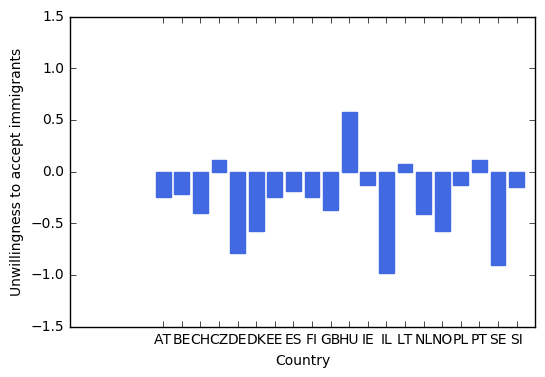

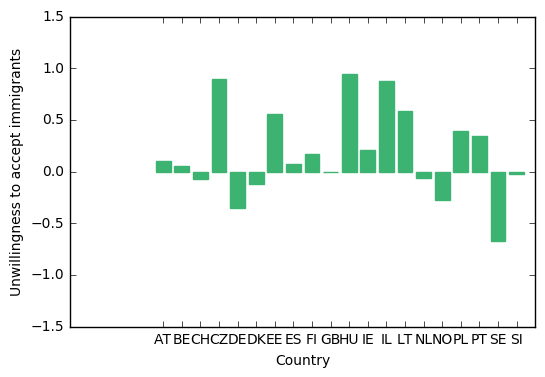

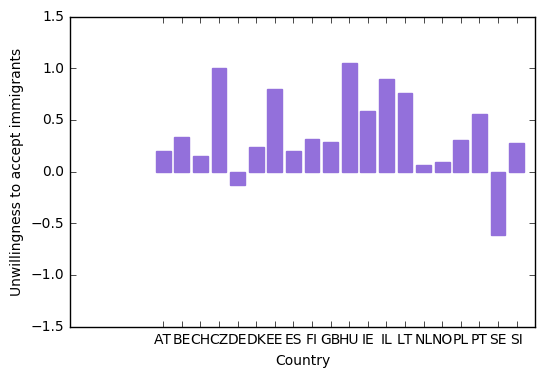

In [60]:
# Create lists for each variable    
aljewlv_mean_list = []
almuslv_mean_list = []    
algyplv_mean_list = []

for country in country_list:
    ess_country = ess[ess.cntry == country]
    aljewlv_mean_list.append(ess_country.aljewlv.mean()-2.5) # making 2.5 the neutral value
    almuslv_mean_list.append(ess_country.almuslv.mean()-2.5)
    algyplv_mean_list.append(ess_country.algyplv.mean()-2.5)
    
thinkplot.PrePlot(3)
PlotBar(aljewlv_mean_list, country_list, "royalblue") 
PlotBar(almuslv_mean_list, country_list, "mediumseagreen")
PlotBar(algyplv_mean_list, country_list, "mediumpurple")




What are the extreme cases?

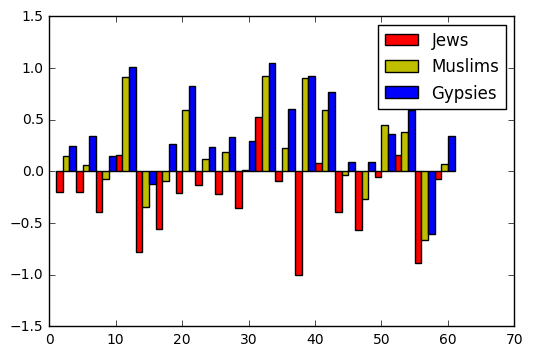

In [89]:
N = len(country_list)

width = 1
# the width of the bars
ind = np.arange(N) 

fig, ax = plt.subplots()
rects1 = ax.bar(ind*3+ width, aljewlv_mean_list, width, color='r')
rects2 = ax.bar(ind*3 + width*2 , almuslv_mean_list, width, color='y')
rects3 = ax.bar(ind*3 + width*3, algyplv_mean_list, width, color='b')


ax.legend((rects1[0], rects2[0], rects3[0]), ('Jews', 'Muslims', 'Gypsies'))

plt.show()


In [90]:
#which country is the most xenophobic in general?

mean_allow =[sum(x)/3 for x in zip(aljewlv_mean_list, almuslv_mean_list, algyplv_mean_list)]

allow_dict = dict(zip(country_list, mean_allow))

find_country = dict(zip(mean_allow, country_list))

max_val = max(allow_dict, key=lambda key: allow_dict[key])
min_val = min(allow_dict, key=lambda key: allow_dict[key])


"""
Find the minimum or maximum from a list.

mylist: list to find min or max of 
maximum: flag (true or false)

returns: min or max based on value of maximum
"""
def MinMaxCountryFromList(mylist, maximum):
    if (maximum):
        return (country_list[mylist.index(max(mylist))]) 
    else:
        return (country_list[mylist.index(min(mylist))]) 
    

array_list = np.array([country_list, aljewlv_mean_list, almuslv_mean_list, algyplv_mean_list, mean_allow])
listdf = pandas.DataFrame(array_list)

print ("max overall: ", max_val) #overall sentiment: people don't want Muslim, Jewish, and Gypsy immigrants
print ("max Jewish: ", MinMaxCountryFromList(aljewlv_mean_list, True))
print ("max Muslim: ", MinMaxCountryFromList(almuslv_mean_list, True))
print ("max Gypsy: ", MinMaxCountryFromList(algyplv_mean_list, True))

print ("min overall: ", min_val) #overall sentiment: people want Muslim, Jewish, and Gypsy immigrants
print ("min Jewish: ", MinMaxCountryFromList(aljewlv_mean_list, False))
print ("min Muslim: ", MinMaxCountryFromList(almuslv_mean_list, False))
print ("min Gypsy: ", MinMaxCountryFromList(algyplv_mean_list, False))

max overall:  HU
max Jewish:  HU
max Muslim:  HU
max Gypsy:  HU
min overall:  SE
min Jewish:  IL
min Muslim:  SE
min Gypsy:  SE


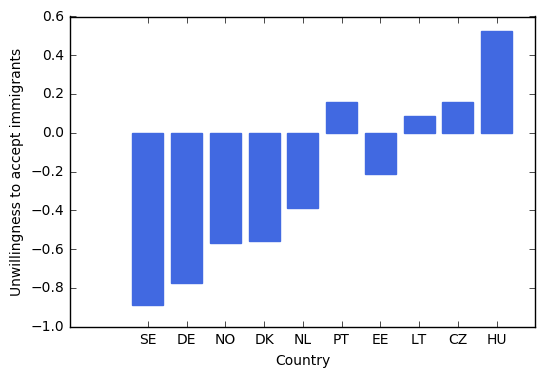

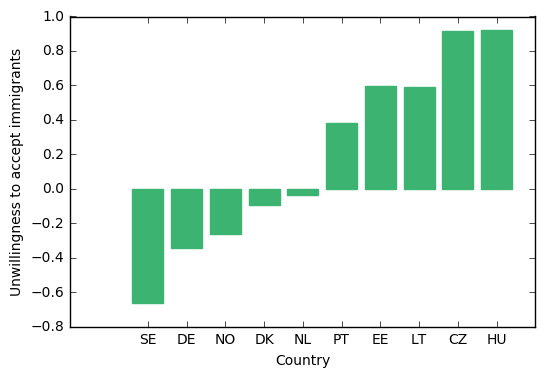

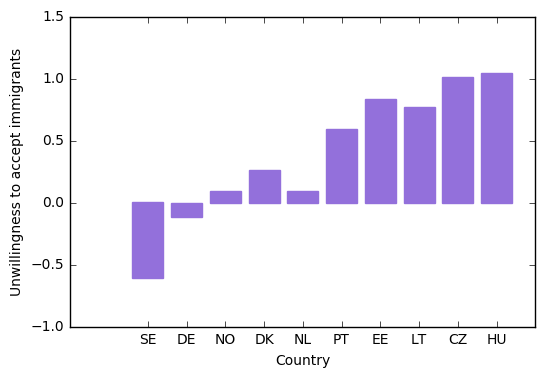

In [91]:
#Find top and bottom 5 and plot

columns = ['Mean']
total_df = pandas.DataFrame(mean_allow, columns=columns)
top_five_call = total_df['Mean'].value_counts().sort_index()


min_max_list = []

sorted_means = sorted(mean_allow)
for val in sorted_means[0:5]:
    min_max_list.append(find_country[val])
for val in sorted_means[len(sorted_means)-5:]:
    min_max_list.append(find_country[val])

aljewlv_mean_short = []
almuslv_mean_short = []
algyplv_mean_short = []

for country in min_max_list:
    ess_country = ess[ess.cntry == country]
    aljewlv_mean_short.append(ess_country.aljewlv.mean()-2.5) # making 2.5 the neutral value
    almuslv_mean_short.append(ess_country.almuslv.mean()-2.5)
    algyplv_mean_short.append(ess_country.algyplv.mean()-2.5)


thinkplot.PrePlot(3)

PlotBar(aljewlv_mean_short, min_max_list, "royalblue") 
PlotBar(almuslv_mean_short, min_max_list, "mediumseagreen")
PlotBar(algyplv_mean_short, min_max_list, "mediumpurple")


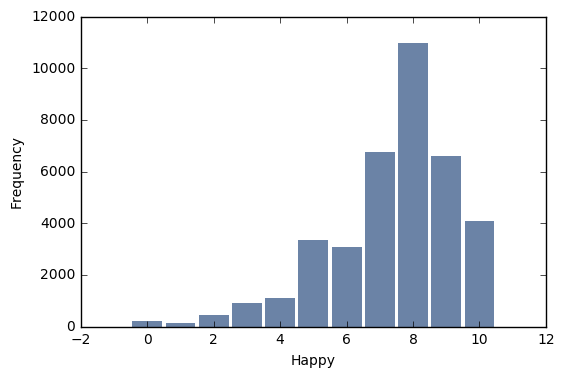

Hist({0.0: 200, 1.0: 154, 2.0: 439, 3.0: 908, 4.0: 1096, 5.0: 3333, 6.0: 3063, 7.0: 6773, 8.0: 10962, 9.0: 6617, 10.0: 4073})

In [92]:
OurPlot(ess.happy, 10, 'Happy')

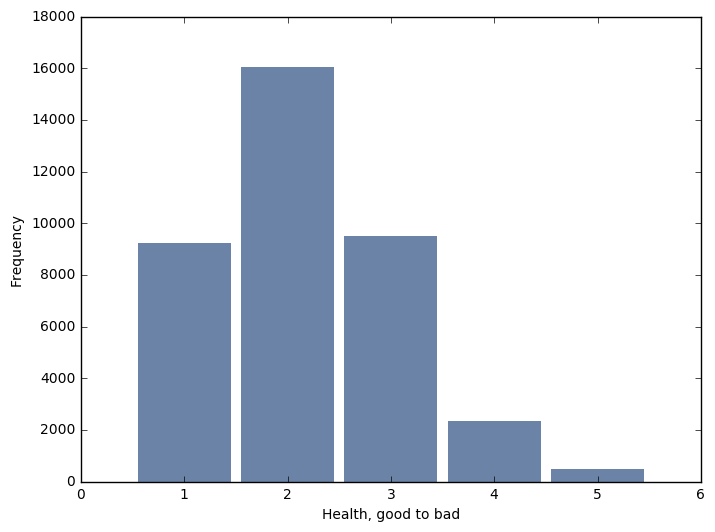

Hist({1.0: 9219, 2.0: 16052, 3.0: 9487, 4.0: 2332, 5.0: 503})

In [93]:
OurPlot(ess.health, 6, 'Health, good to bad')

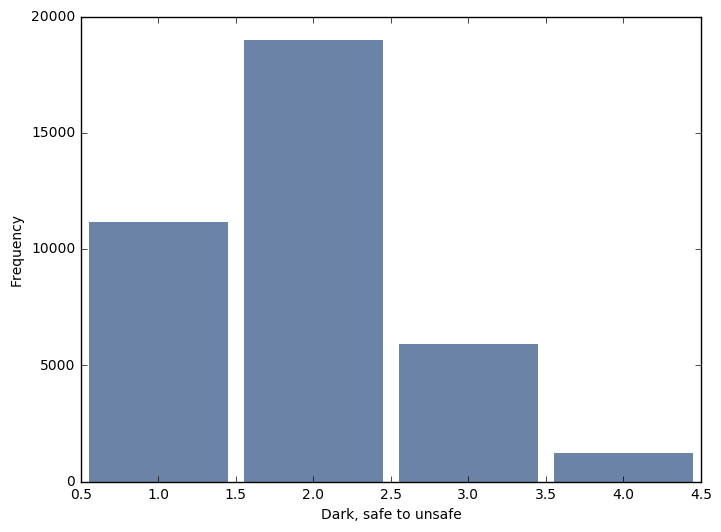

Hist({1.0: 11165, 2.0: 19008, 3.0: 5901, 4.0: 1228})

In [94]:
OurPlot(ess.aesfdrk, 4, 'Dark, safe to unsafe')

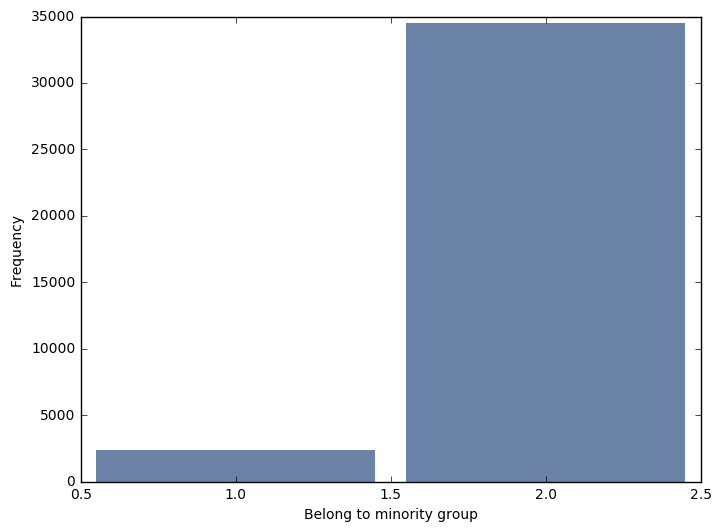

Hist({1.0: 2365, 2.0: 34504})

In [95]:
OurPlot(ess.blgetmg, 2, "Belong to minority group")

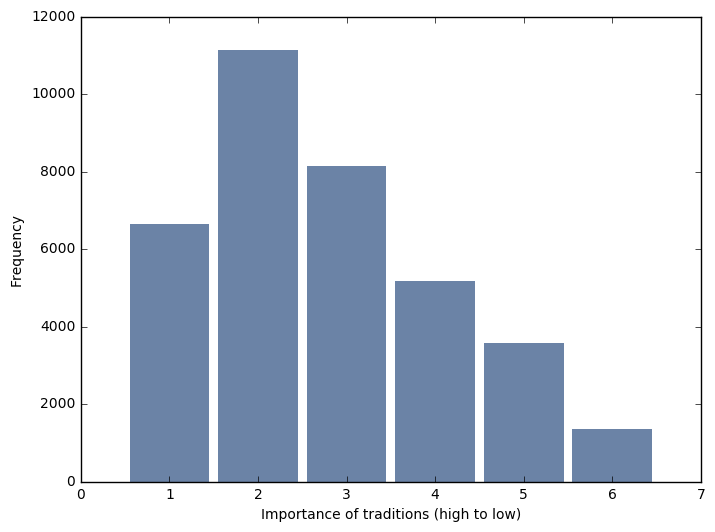

Hist({1.0: 6646, 2.0: 11132, 3.0: 8136, 4.0: 5164, 5.0: 3565, 6.0: 1360})

In [96]:
OurPlot(ess.imptrad, 6, "Importance of traditions (high to low)")

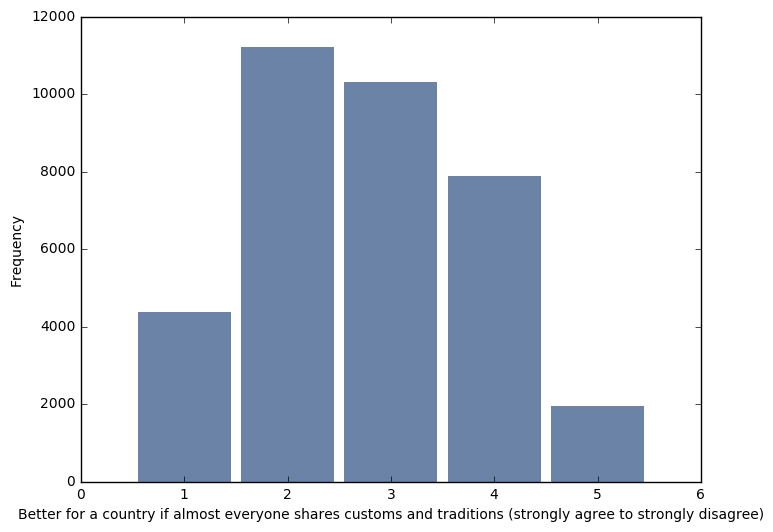

Hist({1.0: 4373, 2.0: 11205, 3.0: 10299, 4.0: 7875, 5.0: 1958})

In [97]:
OurPlot(ess.pplstrd, 5, "Better for a country if almost everyone shares customs and traditions (strongly agree to strongly disagree)")

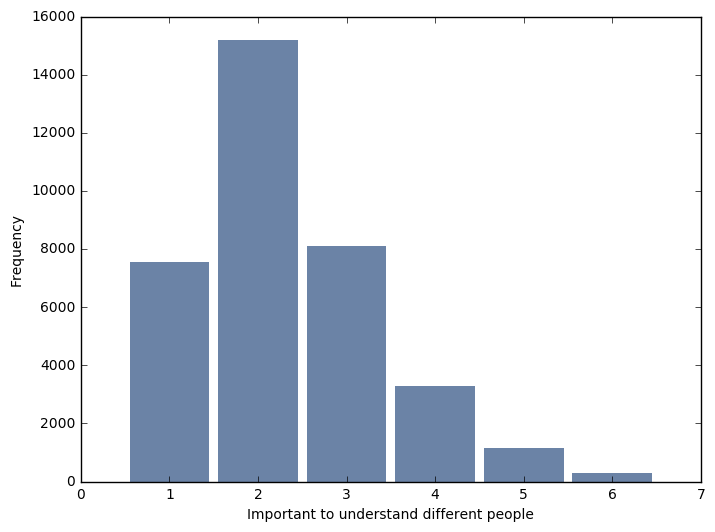

Hist({1.0: 7561, 2.0: 15196, 3.0: 8091, 4.0: 3286, 5.0: 1157, 6.0: 282})

In [98]:
OurPlot(ess.ipudrst, 6, "Important to understand different people")

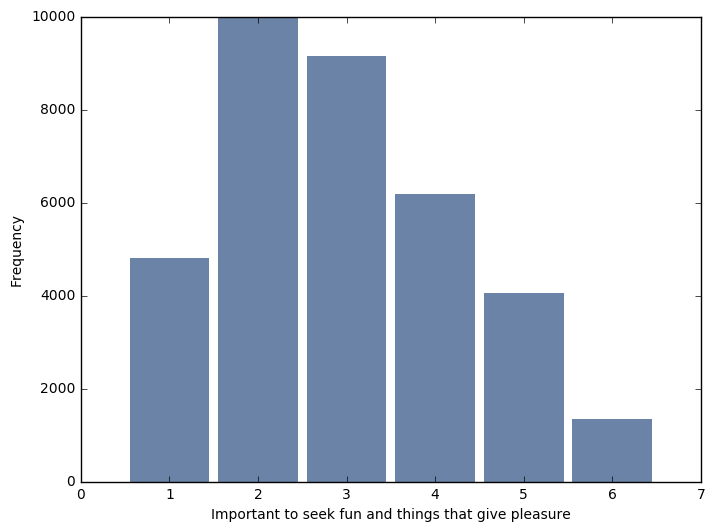

Hist({1.0: 4798, 2.0: 9973, 3.0: 9151, 4.0: 6193, 5.0: 4047, 6.0: 1350})

In [99]:
OurPlot(ess.impfun, 6, "Important to seek fun and things that give pleasure")

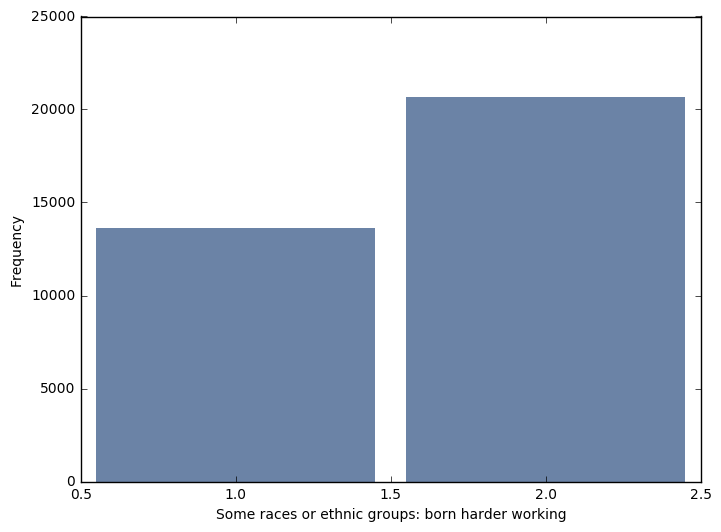

Hist({1.0: 13618, 2.0: 20667})

In [100]:
OurPlot(ess.smegbhw, 2, "Some races or ethnic groups: born harder working")

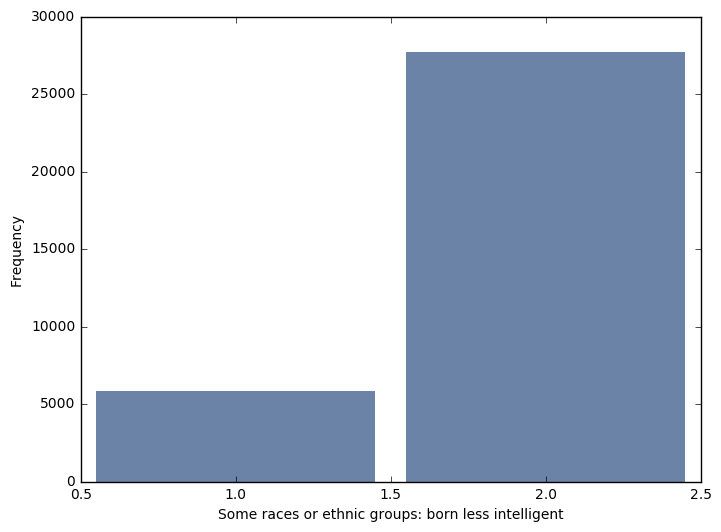

Hist({1.0: 5817, 2.0: 27707})

In [101]:
OurPlot(ess.smegbli, 2, "Some races or ethnic groups: born less intelligent")

In [102]:
"""
Plots a histogram of a variable from a given dataframe.

df: pandas dataframe
column_name: column from df
upper_bound: maximum valid value
label: what the variable is measuring

returns: hist
"""

def CPlot(df, column_name, upper_bound, label):
    df.loc[column_name > upper_bound] = np.nan
    hist = thinkstats2.Hist(column_name)
    thinkplot.Hist(hist)
    thinkplot.Show(xlabel='%s' %label, ylabel='Frequency')
    return hist

In [103]:
# for country in country_list:
#     ess_country = ess[ess.cntry == country]
#     immjew_hist = CPlot(ess_country, ess_country.aljewlv, 4, 'Allow Jewish People (many to none)')